In [1]:
import pandas as pd
import numpy as np
from IPython.display import Image,display
from IPython.core.display import HTML
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score ,silhouette_samples
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

# Reading Data

In [2]:
Books = pd.read_csv('Books.csv',low_memory=False)
Books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
Users = pd.read_csv('Users.csv',low_memory=False)
Users.Age.fillna(value = Users.Age.mean(),inplace=True)
Users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34.751434
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.751434
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.751434


In [4]:
Ratings = pd.read_csv('Ratings.csv')
Ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [6]:
Books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [7]:
Users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Cleaning the Publication year from the books table


In [8]:
Books=Books[~Books['Year-Of-Publication'].isin(['DK Publishing Inc', 'Gallimard'])]
Books['Year-Of-Publication'] = pd.to_numeric(Books['Year-Of-Publication'])
Books.shape

(271357, 8)

#### Analyzing demographics of Books and Users

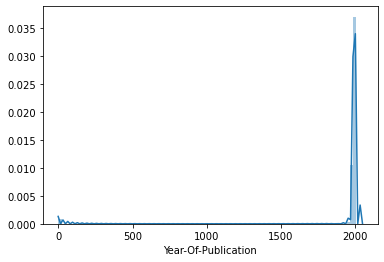

In [9]:
sns.distplot(Books['Year-Of-Publication'],bins=100);

We can see some invalid years in that!

In [10]:
Books['Year-Of-Publication'].describe()

count    271357.000000
mean       1959.760817
std         257.994226
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

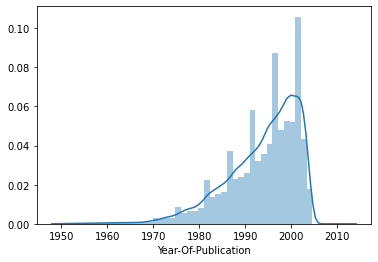

In [11]:
Books = Books[(Books['Year-Of-Publication']>=1950) & (Books['Year-Of-Publication']<=2016)]
sns.distplot(Books['Year-Of-Publication'])

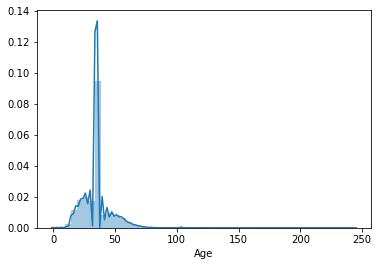

In [12]:
sns.distplot(Users.Age)

We can see some invalid ages in that!

In [13]:
Users.Age.describe()

count    278858.000000
mean         34.751434
std          11.202003
min           0.000000
25%          29.000000
50%          34.751434
75%          35.000000
max         244.000000
Name: Age, dtype: float64

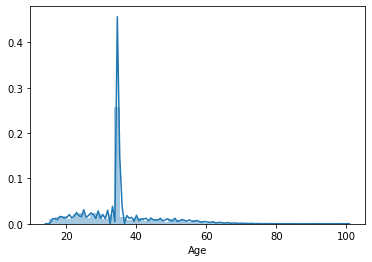

In [14]:
Users = Users[(Users.Age>=15) & (Users.Age<=100)]
sns.distplot(Users.Age)

Cleaning the invalid ISBN and invalid Users from the Ratings Table

In [15]:
print("shape before cleaning:",Ratings.shape)
Ratings = Ratings[Ratings['ISBN'].isin(list(Books['ISBN'].unique()))]
Ratings = Ratings[Ratings['User-ID'].isin(list(Users['User-ID'].unique()))]
print("shape after cleaning:",Ratings.shape)

shape before cleaning: (1149780, 3)
shape after cleaning: (1003113, 3)


#  Collaborative Filtering using K-Means

## Definition of liking a book
We want to get the information whether or not a person likes that book for our filtering. <br>Criteria for that will be : If a person rates a book more than his/her average rating then he/she likes the book.

In [16]:
# Taking the mean of rating given by each user
User_rating_mean = Ratings.groupby('User-ID')['Book-Rating'].mean()
user_rating = Ratings.set_index('User-ID')
user_rating['mean_rating'] = User_rating_mean
user_rating.reset_index(inplace=True)
# Keeping the books in which users "likes" the book
user_rating = user_rating[user_rating['Book-Rating'] > user_rating['mean_rating']]
# Initializing a dummy variable for future use
user_rating['is_fav'] = 1
print(user_rating.shape)
user_rating.head()

(304838, 5)


,User-ID,ISBN,Book-Rating,mean_rating,is_fav
4,276729,0521795028,6,4.5,1
13,276747,0060517794,9,5.0,1
16,276747,0671537458,9,5.0,1
17,276747,0679776818,8,5.0,1
18,276747,0943066433,7,5.0,1


In [17]:
# Keeping the users who like more than 10 books and less than 100 books 
val = user_rating['User-ID'].value_counts()
list_to_keep = list(val[(val>10) & (val<100)].index)
user_rating = user_rating[user_rating['User-ID'].isin(list_to_keep)]
user_rating.shape

(133766, 5)

In [18]:
user_rating.describe()

,User-ID,Book-Rating,mean_rating,is_fav
count,133766.000000,133766.000000,133766.000000,133766.0
mean,140062.382123,7.876119,3.805442,1.0
std,79597.401062,1.657655,1.935175,0.0
min,242.000000,1.000000,0.019385,1.0
25%,71853.000000,7.000000,2.337423,1.0
50%,138995.000000,8.000000,3.588235,1.0
75%,209160.000000,9.000000,4.980769,1.0
max,278851.000000,10.000000,9.941176,1.0


## Creating crosstab for each user and each book

In [19]:
%%time
df = pd.pivot_table(user_rating,index='User-ID',columns='ISBN',values='is_fav')
df.fillna(value=0,inplace=True)
print(df.shape)
df.head(10)

(4790, 68438)
Wall time: 41.6 s


ISBN,0001047973,000104799X,0001048082,0001360469,0001374362,0001374869,000160418X,0001714600,0001821326,0001941941,...,B00009EF82,B00009MBYK,B0000AZW79,B0000C2W5U,B0000DAPP1,B0000T6KIM,B0000VZEH8,B00011SOXI,B0001FZGRQ,B0001GMSV2
User-ID,,,,,,,,,,,,,,,,,,,,,
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df.shape #(no. of users to be clustered,no. of books that they like from)

(4790, 68438)

### Using PCA for dimension reduction 

In [21]:
%%time
pca = PCA(n_components=3)
pca.fit(df)
pca_fit = pca.transform(df)

Wall time: 33.9 s


In [22]:
pca_fit = pd.DataFrame(pca_fit,index=df.index)
pca_fit

,0,1,2
User-ID,,,
242,-0.206516,-0.021588,-0.003033
243,0.312729,-0.264444,0.008837
254,0.641215,1.910901,-0.115153
388,-0.155362,-0.040553,-0.002993
392,-0.196540,-0.022940,-0.000419
...,...,...,...
278535,-0.092862,-0.023552,-0.094269
278582,-0.019693,-0.087220,-0.018378
278633,0.778301,-0.478061,-0.499074


# Applying Clustering

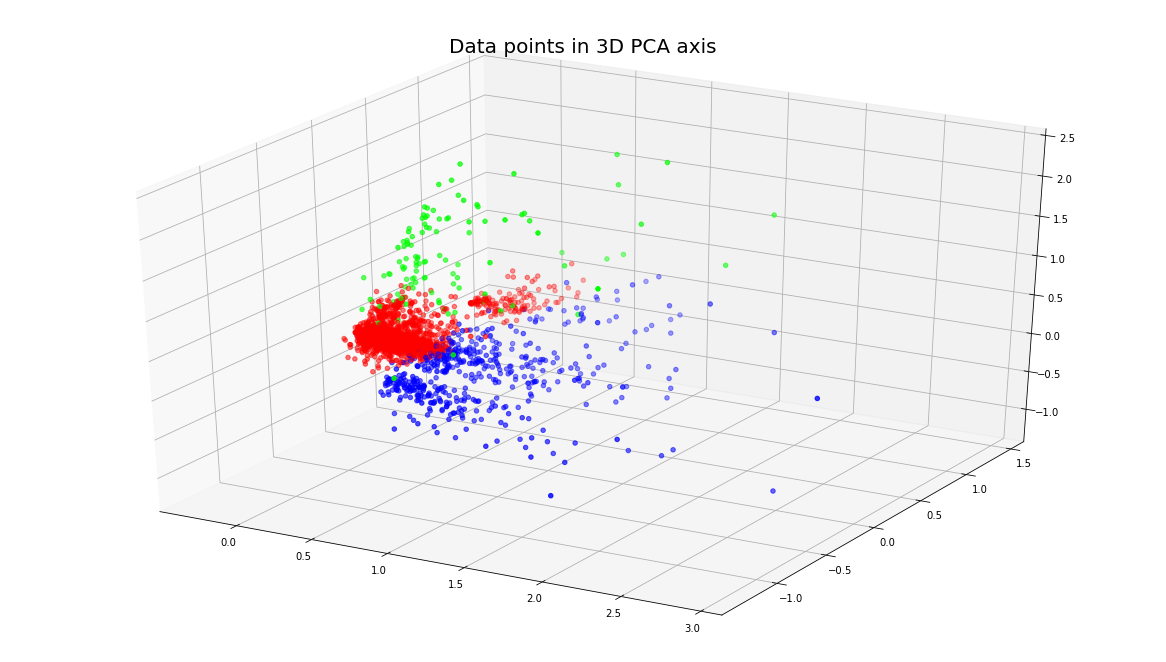

In [23]:
Kmm = KMeans(n_clusters=3)
plt.rcParams['figure.figsize'] = (16, 9)
clusters = Kmm.fit_predict(pca_fit)
cmhot = plt.get_cmap('brg')
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=clusters,cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

# Choosing value for K <br>
## 1. The Elbow Method

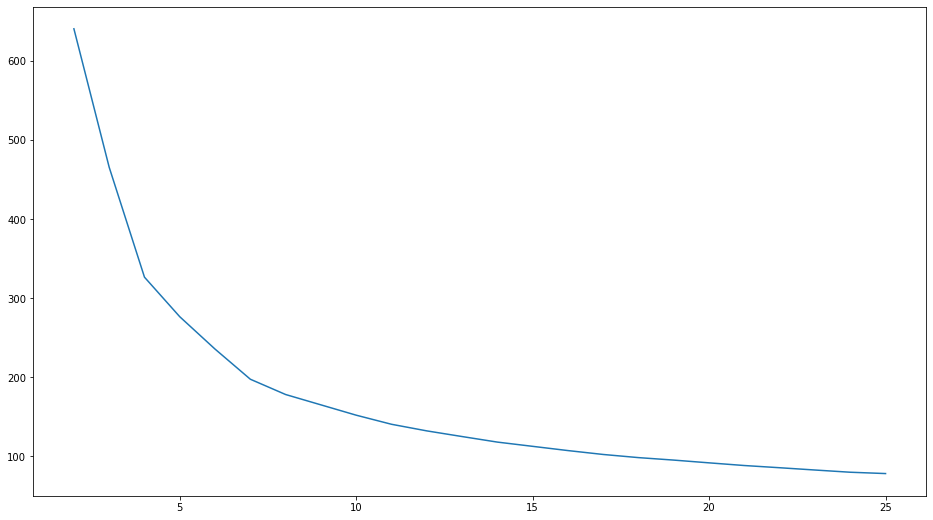

In [24]:
TSS = []
for i in range(2,26):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(pca_fit)
    TSS.append(km.inertia_)
plt.plot(range(2,26),TSS,'-')

**We didn't get a clear elbow so we have to try another method** <br>
## 2. Silhouette Analysis

For n_clusters = 3 The average silhouette_score is : 0.6573095377989592
For n_clusters = 4 The average silhouette_score is : 0.6927655923987114
For n_clusters = 5 The average silhouette_score is : 0.5165374440366199
For n_clusters = 6 The average silhouette_score is : 0.5416389033792498
For n_clusters = 7 The average silhouette_score is : 0.550718450957478
For n_clusters = 8 The average silhouette_score is : 0.5344171610505496


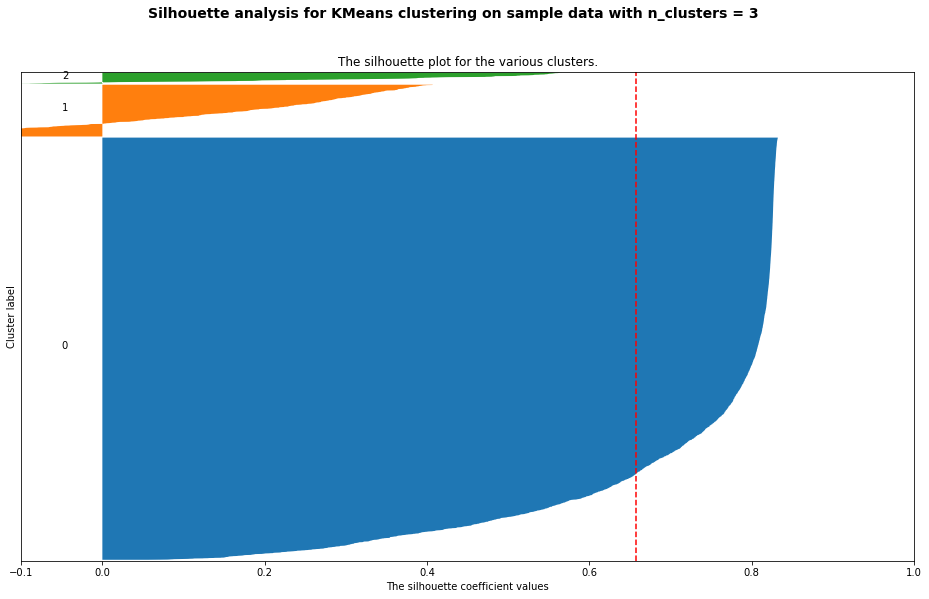

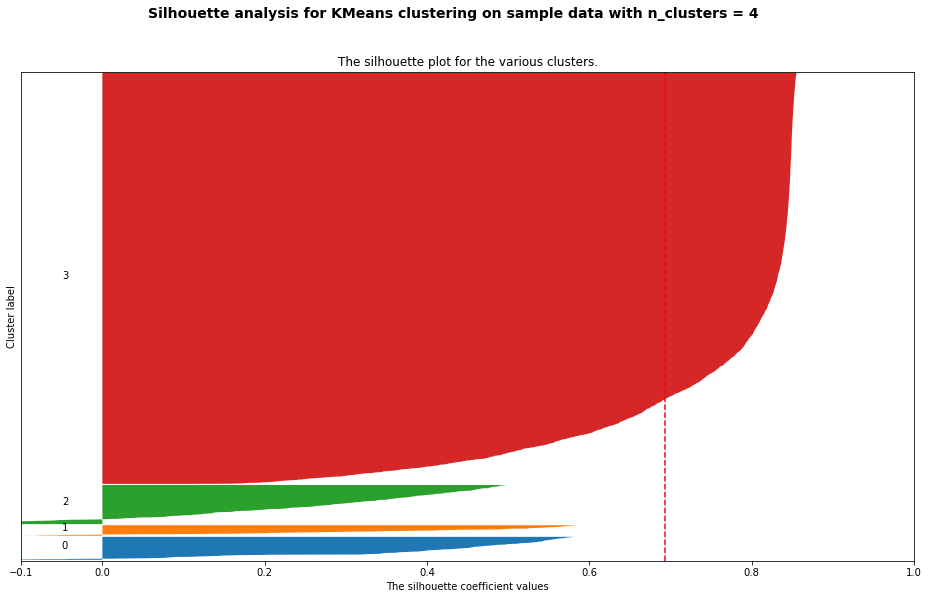

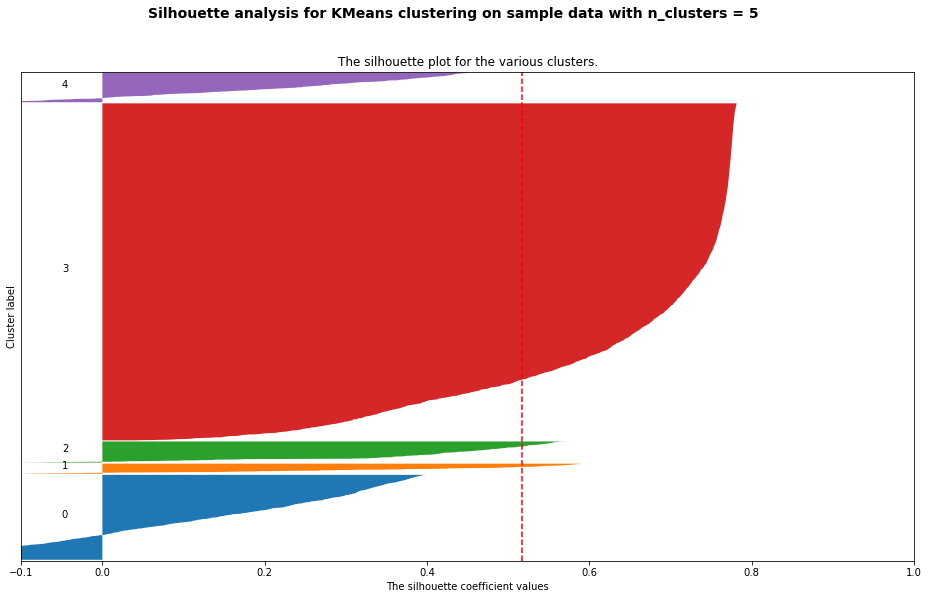

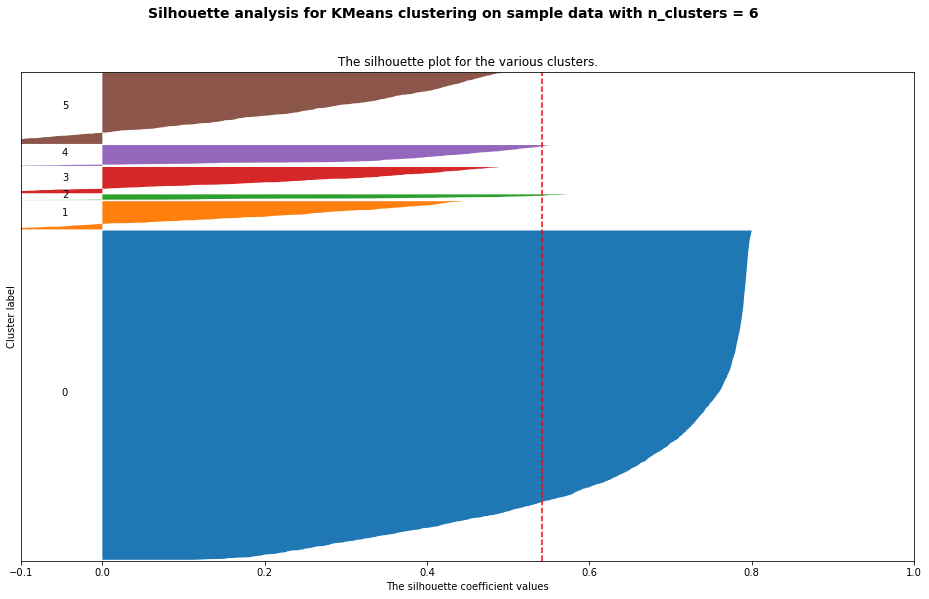

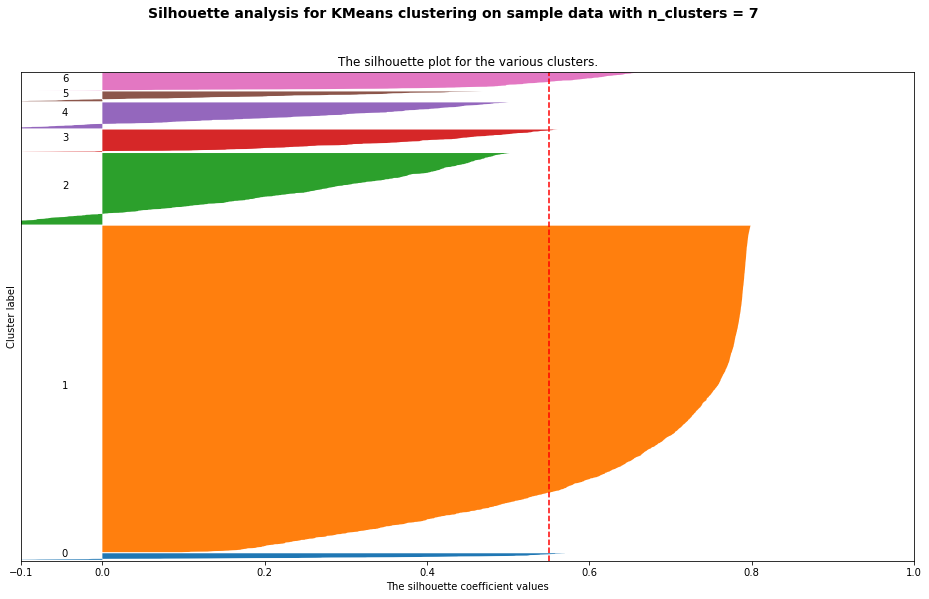

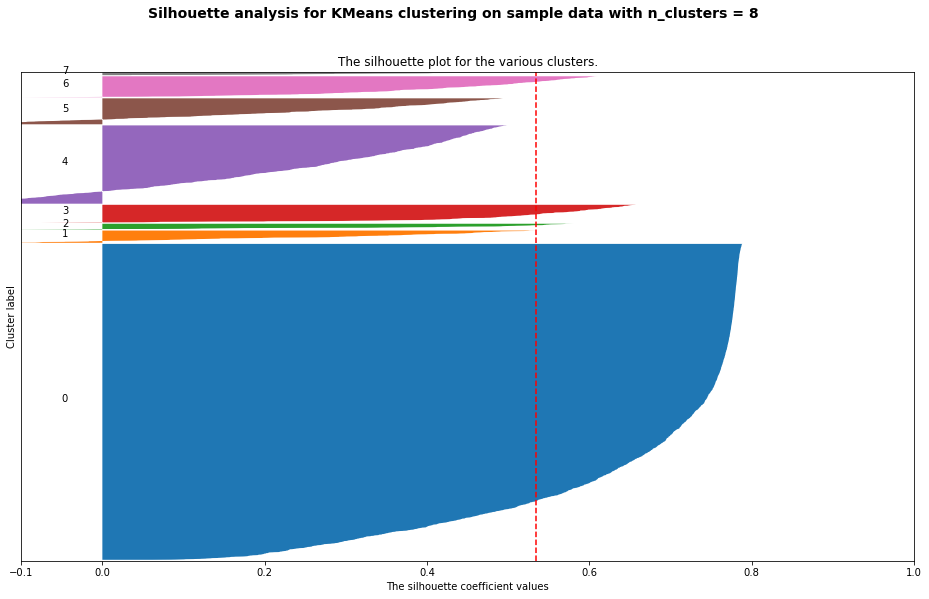

In [25]:
for n in [3,4,5,6,7,8]:
    ax1 = plt.figure().gca()
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(pca_fit) + (n + 1) * 10])
    km = KMeans(n_clusters=n,random_state=0)
    clusters = km.fit_predict(pca_fit)
    silhouette_avg = silhouette_score(pca_fit, clusters)
    print("For n_clusters =", n,
          "The average silhouette_score is :", silhouette_avg)
    silhouette_values = silhouette_samples(pca_fit, clusters)
    y_start = 10
    for i in range(n):
        ith_cluster = np.sort(silhouette_values[clusters==i])
        cluster_size = ith_cluster.shape[0]
        y_end = y_start + cluster_size 
        ax1.fill_betweenx(np.arange(y_start, y_end),
                          0, ith_cluster)
        ax1.text(-0.05, y_start + 0.5 * cluster_size, str(i))
        y_start = y_end + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n),
                 fontsize=14, fontweight='bold')
plt.show()

**Seems like K = 4 provides the best Clustering**

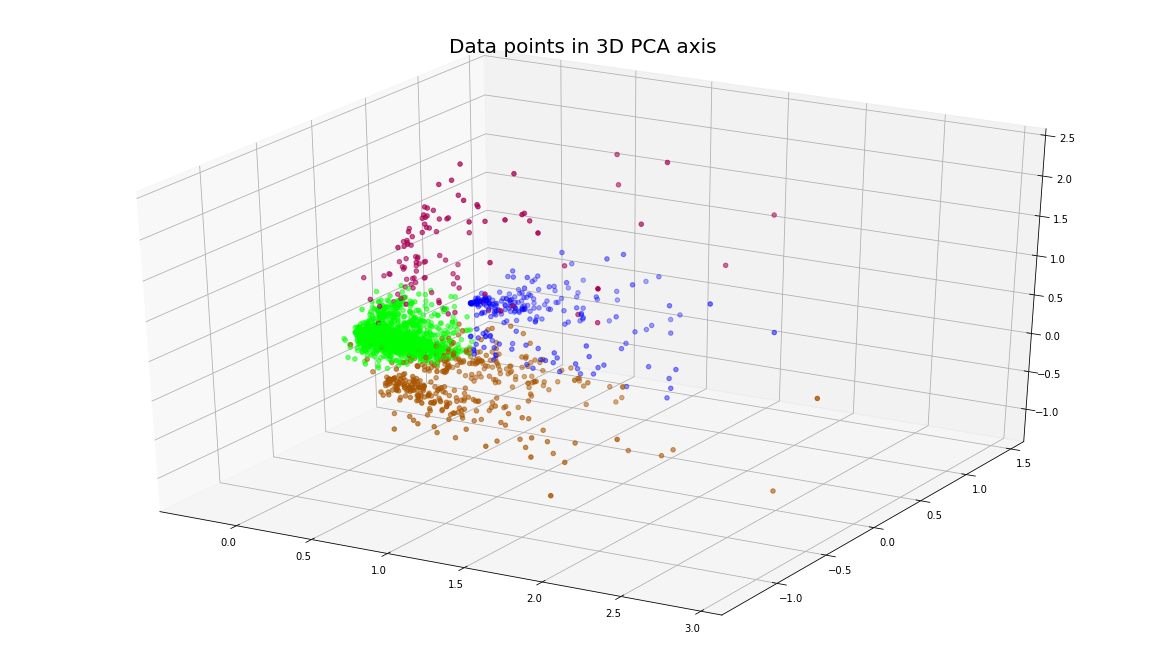

In [26]:
Kmeans_final = KMeans(n_clusters=4,random_state=0).fit(pca_fit)
df['cluster'] = Kmeans_final.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(pca_fit[0], pca_fit[2], pca_fit[1],c=df['cluster'],cmap=cmhot)
plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()
# Gettings the books for each cluster
cl1_books = df[df.cluster == 0].mean()
cl2_books = df[df.cluster == 1].mean()
cl3_books = df[df.cluster == 2].mean()
cl4_books = df[df.cluster == 3].mean()
# Getting the users for each cluster
cl1_users = df[df.cluster == 0].index
cl2_users = df[df.cluster == 1].index
cl3_users = df[df.cluster == 2].index
cl4_users = df[df.cluster == 3].index

# Analysing Clusters
## Cluster 1<br>
## Books and Authors

In [27]:
def cluster_books_des(Ser):
    bks = pd.DataFrame(Ser).merge(Books,left_index=True,right_on='ISBN',how='left')
    bks.rename(columns={0:'avg_score'},inplace=True)
    bks.sort_values(by='avg_score',ascending=False,inplace=True)
    print('Median Year:',int(bks['Year-Of-Publication'].median()))
    print('\nTop 5 Books\n')
    Top5_books = bks.index[:5]
    for i,isbn in enumerate(Top5_books):
        print(str(i+1)+'.',bks.loc[isbn]['Book-Title'])
        display(Image(url=bks.loc[isbn]['Image-URL-M']))
    Top5_authors = bks['Book-Author'].unique()[:5]
    print('Top 5 Authors\n')
    for i,auth in enumerate(Top5_authors):
        print(str(i+1)+'.',auth)
cluster_books_des(cl1_books)

Median Year: 1997

Top 5 Books

1. The Da Vinci Code


2. Angels &amp; Demons


3. The Secret Life of Bees


4. The Red Tent (Bestselling Backlist)


5. The Five People You Meet in Heaven


Top 5 Authors

1. Dan Brown
2. Sue Monk Kidd
3. Anita Diamant
4. Mitch Albom
5. Jennifer Weiner


## Users

Most Common Location: portland, oregon, usa

Mean Age: 36.17252012530014


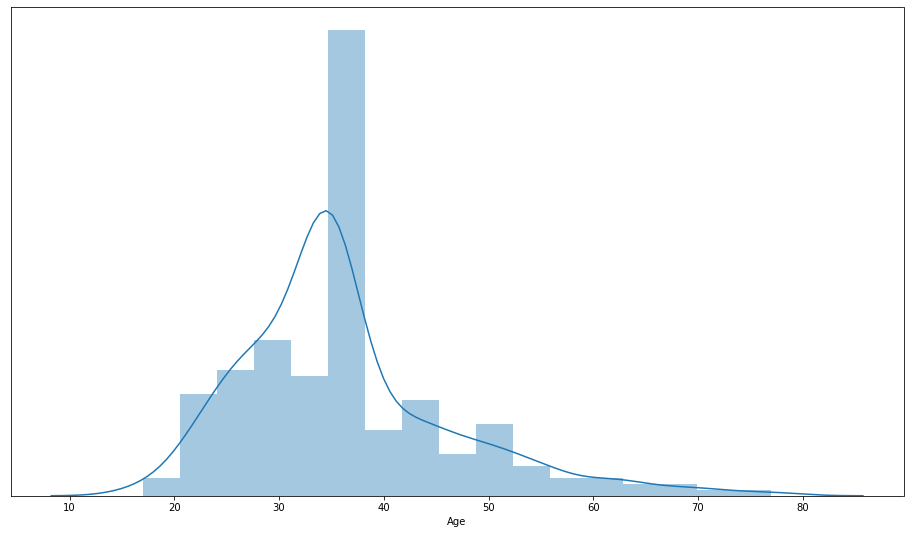

In [28]:
def cluster_user_des(Ser):
    cl_user = Users[Users['User-ID'].isin(list(Ser))]
    print('Most Common Location:',cl_user['Location'].mode()[0])
    print('\nMean Age:',cl_user['Age'].mean())
    sns.distplot(cl_user['Age'])
    plt.yticks([])
cluster_user_des(cl1_users)

## Cluster 2

In [29]:
cluster_books_des(cl2_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. Harry Potter and the Prisoner of Azkaban (Book 3)


2. Harry Potter and the Chamber of Secrets (Book 2)


3. Harry Potter and the Order of the Phoenix (Book 5)


4. Harry Potter and the Goblet of Fire (Book 4)


5. Harry Potter and the Sorcerer's Stone (Book 1)


Top 5 Authors

1. J. K. Rowling
2. J.D. Salinger
3. J.R.R. TOLKIEN
4. Thomas Harris
5. ANNE RICE


Looks like this group belongs to the potterheads!!

Most Common Location: edmonton, alberta, canada

Mean Age: 30.583483530952844


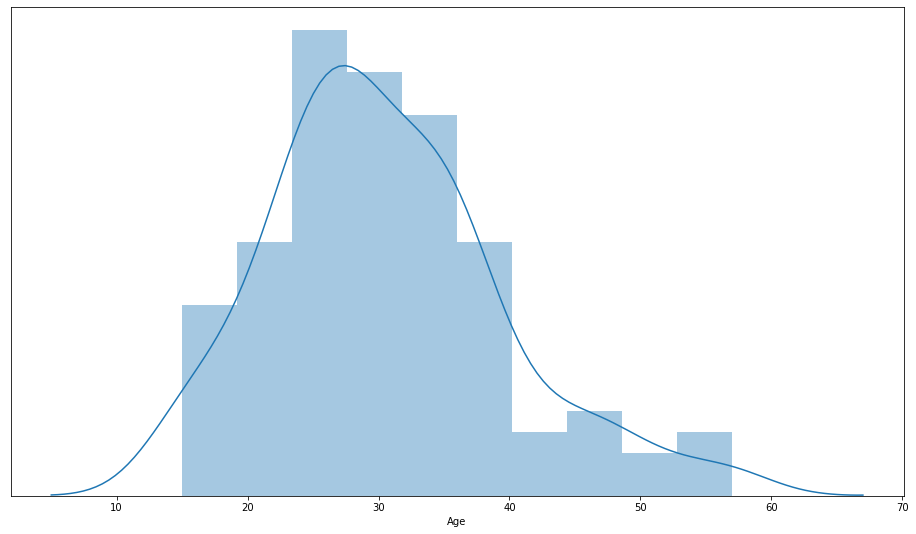

In [30]:
cluster_user_des(cl2_users)

## Cluster 3

In [31]:
cluster_books_des(cl3_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. The Lovely Bones: A Novel


2. Where the Heart Is (Oprah's Book Club (Paperback))


3. The Pilot's Wife : A Novel


4. The Secret Life of Bees


5. Divine Secrets of the Ya-Ya Sisterhood: A Novel


Top 5 Authors

1. Alice Sebold
2. Billie Letts
3. Anita Shreve
4. Sue Monk Kidd
5. Rebecca Wells


Most Common Location: sacramento, california, usa

Mean Age: 34.68656237611405


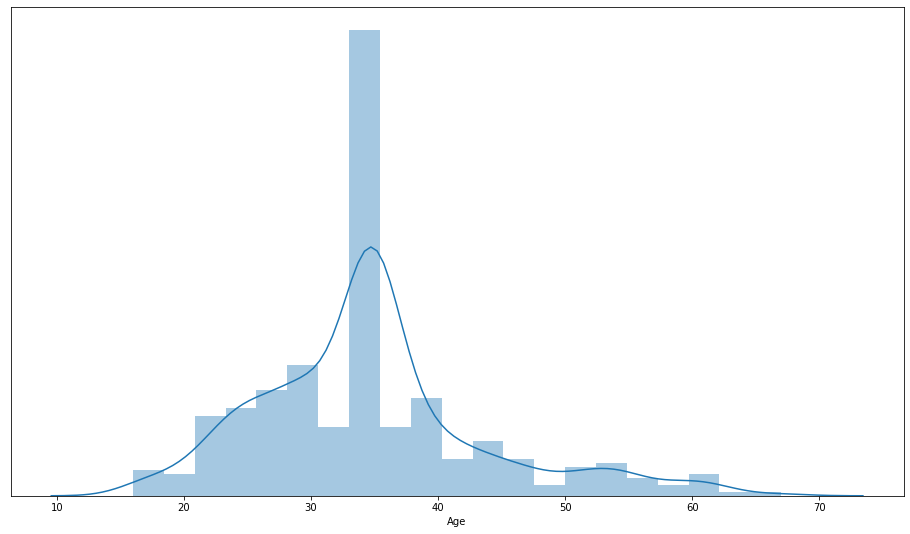

In [32]:
cluster_user_des(cl3_users)

## Cluster 4

In [33]:
cluster_books_des(cl4_books.drop('cluster'))

Median Year: 1997

Top 5 Books

1. Interview with the Vampire


2. Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))


3. The Red Tent (Bestselling Backlist)


4. Jurassic Park


5. The Secret Life of Bees


Top 5 Authors

1. Anne Rice
2. J. K. Rowling
3. Anita Diamant
4. Michael Crichton
5. Sue Monk Kidd


Most Common Location: toronto, ontario, canada

Mean Age: 35.52604842780248


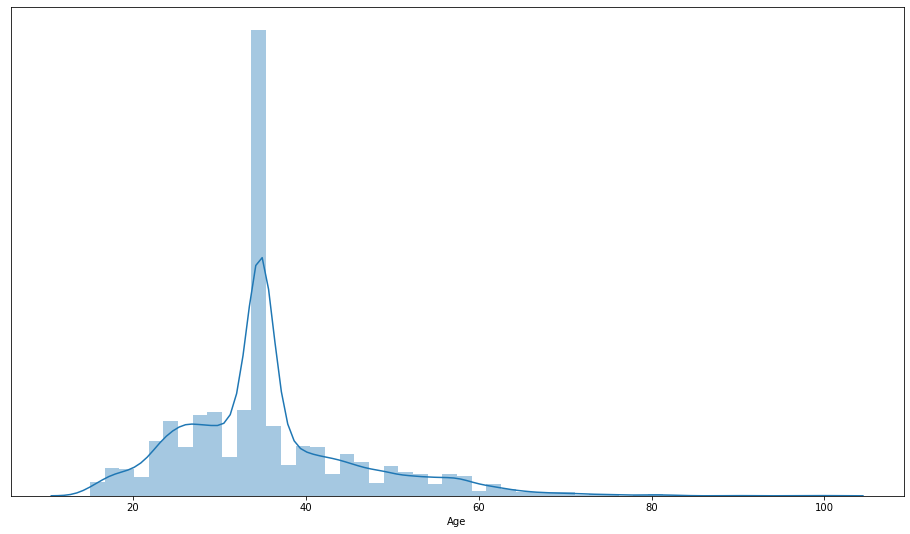

In [34]:
cluster_user_des(cl4_users)